In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [8]:
data = pd.read_excel('Employees.xlsx', date_format=[['Start Date']])

In [9]:
data.head()

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192
3,4,Lwiy,Qbany,Male,2018-08-14,2,Manufacturing,United Arab Emirates,Main,1828,21936,3.0,0,0,7
4,5,Ahmad,Bikri,Male,2020-03-11,0,Manufacturing,Egypt,Main,970,11640,5.0,0,5,121


In [10]:
data.columns

Index(['No', 'First Name', 'Last Name', 'Gender', 'Start Date', 'Years',
       'Department', 'Country', 'Center', 'Monthly Salary', 'Annual Salary',
       'Job Rate', 'Sick Leaves', 'Unpaid Leaves', 'Overtime Hours'],
      dtype='object')

In [11]:
data.shape

(689, 15)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   No              689 non-null    int64         
 1   First Name      689 non-null    object        
 2   Last Name       689 non-null    object        
 3   Gender          689 non-null    object        
 4   Start Date      689 non-null    datetime64[ns]
 5   Years           689 non-null    int64         
 6   Department      689 non-null    object        
 7   Country         689 non-null    object        
 8   Center          689 non-null    object        
 9   Monthly Salary  689 non-null    int64         
 10  Annual Salary   689 non-null    int64         
 11  Job Rate        689 non-null    float64       
 12  Sick Leaves     689 non-null    int64         
 13  Unpaid Leaves   689 non-null    int64         
 14  Overtime Hours  689 non-null    int64         
dtypes: dat

In [13]:
data.isna().sum()

No                0
First Name        0
Last Name         0
Gender            0
Start Date        0
Years             0
Department        0
Country           0
Center            0
Monthly Salary    0
Annual Salary     0
Job Rate          0
Sick Leaves       0
Unpaid Leaves     0
Overtime Hours    0
dtype: int64

In [14]:
data.duplicated().sum()

np.int64(0)

In [15]:
data.head(3)

,No,First Name,Last Name,Gender,Start Date,Years,Department,Country,Center,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
0,1,Ghadir,Hmshw,Male,2018-04-04,2,Quality Control,Egypt,West,1560,18720,3.0,1,0,183
1,2,Omar,Hishan,Male,2020-05-21,0,Quality Control,Saudi Arabia,West,3247,38964,1.0,0,5,198
2,3,Ailya,Sharaf,Female,2017-09-28,3,Major Mfg Projects,Saudi Arabia,West,2506,30072,2.0,0,3,192


In [16]:
data['Gender'].value_counts()

Gender
Male      449
Female    240
Name: count, dtype: int64

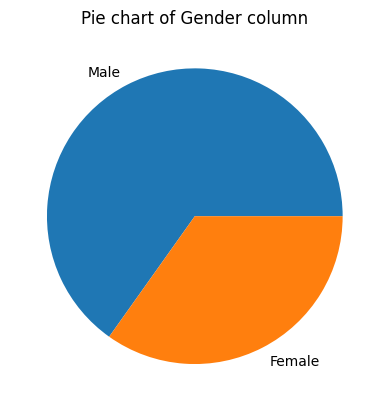

In [17]:
data['Gender'].value_counts().sort_values(ascending= False).plot(kind = 'pie')
plt.title('Pie chart of Gender column')
plt.ylabel('')
plt.show()

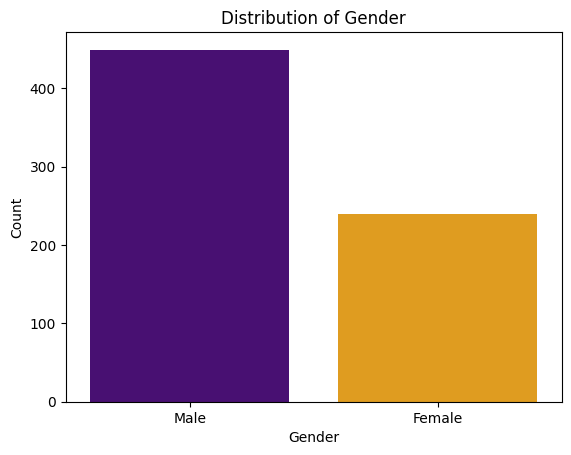

In [18]:
sns.countplot(x='Gender', data=data, palette= ['indigo', 'orange'])
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

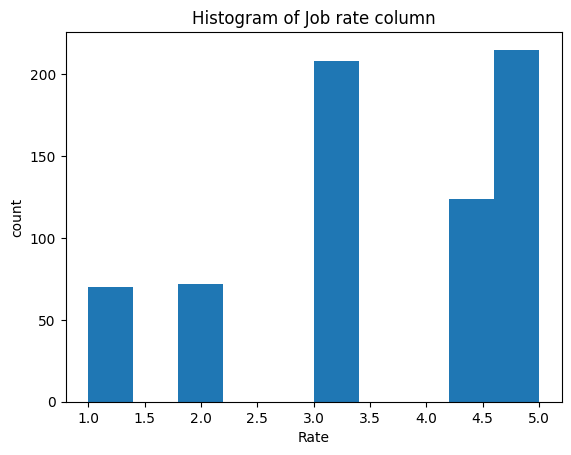

In [19]:
plt.hist(x = data['Job Rate'])
plt.title('Histogram of Job rate column')
plt.xlabel('Rate')
plt.ylabel('count')
plt.show()

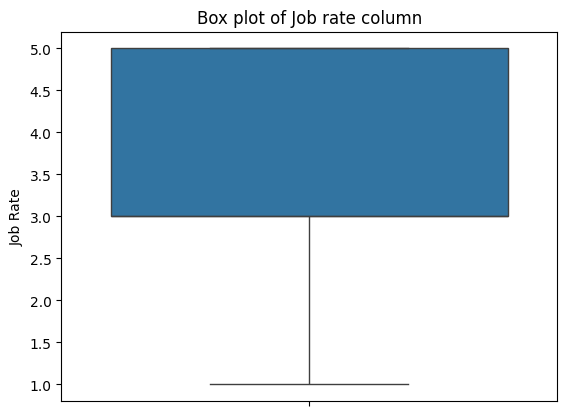

In [20]:
sns.boxplot(y = 'Job Rate', data = data)
plt.title('Box plot of Job rate column')
plt.show()

In [21]:
data['Job Rate'].describe()

count    689.000000
mean       3.586357
std        1.350125
min        1.000000
25%        3.000000
50%        3.000000
75%        5.000000
max        5.000000
Name: Job Rate, dtype: float64

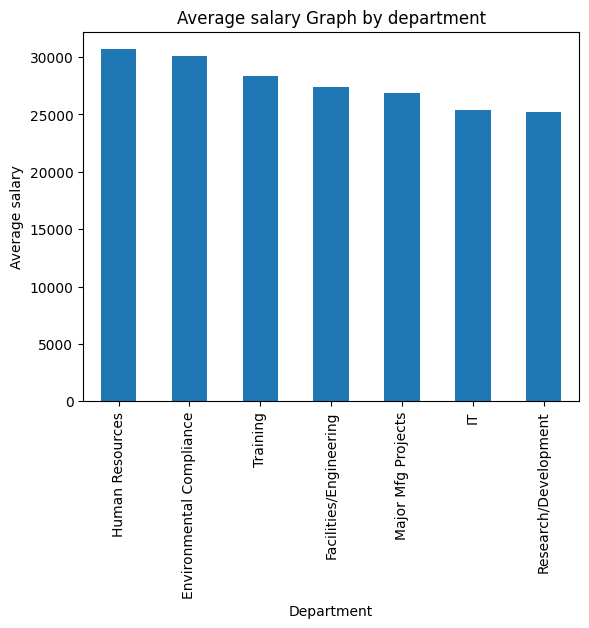

In [22]:
data.groupby('Department')['Annual Salary'].mean().sort_values(ascending= False).head(7).plot(kind = 'bar')
plt.title('Average salary Graph by department')
plt.xlabel('Department')
plt.ylabel('Average salary')
plt.show()

In [23]:
data.groupby('Center')['Monthly Salary'].mean().sort_values(ascending = False)

Center
East     2274.021277
West     2068.672269
North    2064.811594
Main     2054.776892
South    1981.153846
Name: Monthly Salary, dtype: float64

In [24]:
data['Country'].unique()

array(['Egypt', 'Saudi Arabia', 'United Arab Emirates', 'Syria',
       'Lebanon'], dtype=object)

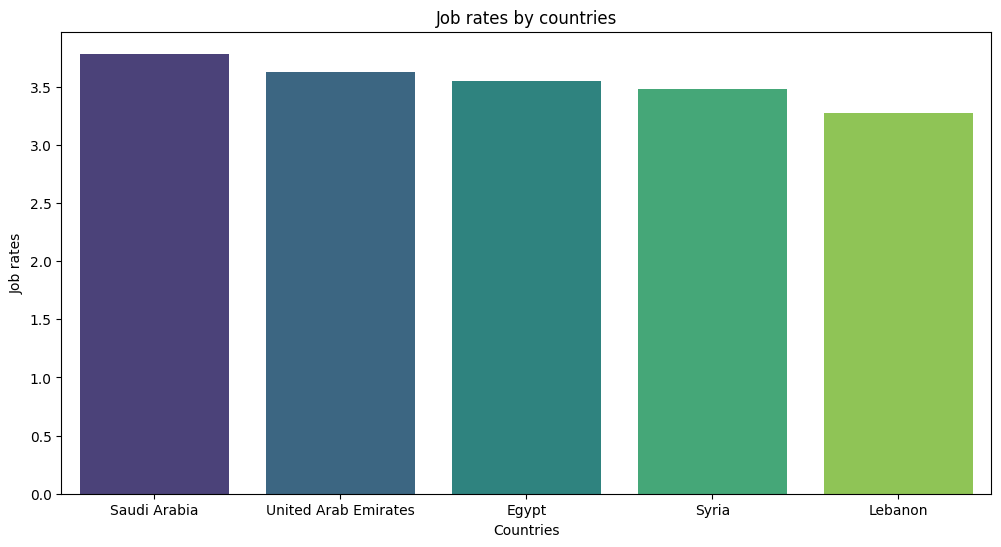

In [25]:
job_rate_by_countries = data.groupby('Country')['Job Rate'].mean().sort_values(ascending = False).reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data = job_rate_by_countries, x = 'Country', y='Job Rate', palette= 'viridis')
plt.title('Job rates by countries')
plt.xlabel('Countries')
plt.ylabel('Job rates')
plt.show()

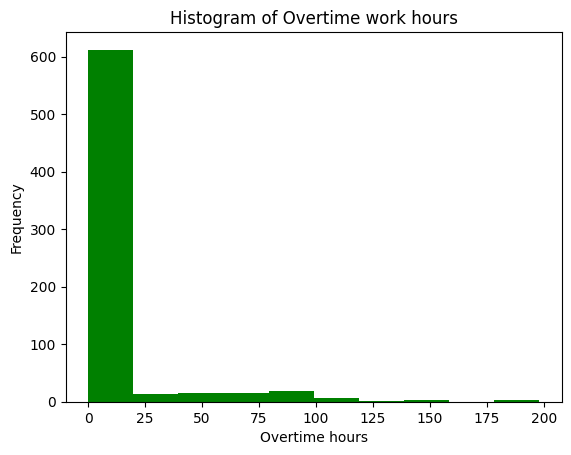

In [26]:
plt.hist(data['Overtime Hours'], color= 'green')
plt.title('Histogram of Overtime work hours')
plt.xlabel('Overtime hours')
plt.ylabel('Frequency')
plt.show()

In [27]:
data['Overtime Hours'].describe()

count    689.000000
mean      13.702467
std       25.692049
min        0.000000
25%        3.000000
50%        7.000000
75%       10.000000
max      198.000000
Name: Overtime Hours, dtype: float64

In [28]:
data.describe()

,No,Start Date,Years,Monthly Salary,Annual Salary,Job Rate,Sick Leaves,Unpaid Leaves,Overtime Hours
count,689.000000,689,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000,689.000000
mean,345.000000,2019-01-25 09:20:06.966618368,1.476052,2068.201742,24818.420900,3.586357,1.609579,0.759071,13.702467
min,1.000000,2016-01-08 00:00:00,0.000000,703.000000,8436.000000,1.000000,0.000000,0.000000,0.000000
25%,173.000000,2018-04-05 00:00:00,1.000000,1436.000000,17232.000000,3.000000,0.000000,0.000000,3.000000
50%,345.000000,2019-04-03 00:00:00,1.000000,2077.000000,24924.000000,3.000000,0.000000,0.000000,7.000000
75%,517.000000,2019-12-22 00:00:00,2.000000,2682.000000,32184.000000,5.000000,3.000000,0.000000,10.000000
max,689.000000,2020-12-29 00:00:00,5.000000,3450.000000,41400.000000,5.000000,6.000000,6.000000,198.000000
std,199.041453,NaN,1.190963,763.289240,9159.470878,1.350125,2.196051,1.647764,25.692049


In [29]:
X = data[['Years' , 'Job Rate']]
Y = data['Annual Salary']

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2)

In [31]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((551, 2), (138, 2), (551,), (138,))

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()
p_grid = {
    'n_estimators' : np.arange(50, 200, 50),
    'max_depth' : [None, 10, 20, 30],
    'min_samples_split' : np.arange(2, 10, 3),
    'min_samples_leaf' : [1, 2, 4]
}

grid = GridSearchCV(estimator= rf, param_grid= p_grid, cv = 5, scoring = 'neg_mean_absolute_error', n_jobs = -1)
grid.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': array([2, 5, 8]),
                         'n_estimators': array([ 50, 100, 150])},
             scoring='neg_mean_absolute_error')

In [ ]:
# grid.best_estimator_

RandomForestRegressor(max_depth=30, min_samples_leaf=4,
                      min_samples_split=np.int64(2), n_estimators=np.int64(50))

In [34]:
grid.best_params_

{'max_depth': 30,
 'min_samples_leaf': 4,
 'min_samples_split': np.int64(2),
 'n_estimators': np.int64(50)}

In [35]:
grid.best_score_

np.float64(-7879.111215824877)

In [36]:
Y_pred = grid.predict(X_test)

In [37]:
Y_pred

array([23982.10304329, 26889.4844265 , 22858.14399713, 24735.01396089,
       25340.357328  , 25308.38802405, 25197.4854375 , 24616.05811274,
       25197.4854375 , 25197.4854375 , 25046.67837054, 25161.92406522,
       26889.4844265 , 25197.4854375 , 25308.38802405, 26373.41451304,
       24269.76066973, 25197.4854375 , 23303.68272345, 25487.58828281,
       25046.67837054, 24269.76066973, 22968.02533744, 23303.68272345,
       25049.10176151, 25128.48303247, 25375.65747347, 27968.37469933,
       27968.37469933, 25046.67837054, 26373.41451304, 25197.4854375 ,
       25161.92406522, 27968.37469933, 25049.10176151, 22968.02533744,
       25128.48303247, 25161.92406522, 22968.02533744, 25161.92406522,
       24269.76066973, 25161.92406522, 25049.10176151, 22858.14399713,
       25197.4854375 , 25104.32423606, 24735.01396089, 25197.4854375 ,
       25375.65747347, 24269.76066973, 24269.76066973, 25049.10176151,
       25197.4854375 , 25161.92406522, 23303.68272345, 25161.92406522,
      

In [38]:
from sklearn.metrics import mean_absolute_error
Mae = mean_absolute_error(Y_test, Y_pred)
print(f'Mean absolute error {Mae:.3f}')

Mean absolute error 8214.671


In [39]:
import joblib
joblib.dump(grid.best_estimator_, 'Random forest regressor model.pkl')

['Random forest regressor model.pkl']